In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [3]:
rowsize=112
colsize=112
data=[]
labels=[]

In [4]:
folders=['with_mask','without_mask','mask_weared_incorrect']
code={0:(1,0,0),1:(0,1,0),2:(0,0,1)}
i=0
label=[]
for category in folders:    
    path=os.path.join('dataset_3class',category)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        try:
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(rowsize,colsize))
            data.append(img)
            labels.append(category)
            label.append(code[i])
        except Exception as E:
            print("Exception encountered: ",E)
    i+=1

In [6]:
label=np.array(label)
label

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [7]:
np.save('data_cnn3',data)
np.save('labels_cnn3',labels)
np.save('labelsi_cnn3',labels)

In [8]:
import numpy as np
data=np.load('data_cnn3.npy')


In [12]:
labels=np.load('labels_cnn3.npy')
labels

array(['with_mask', 'with_mask', 'with_mask', ...,
       'mask_weared_incorrect', 'mask_weared_incorrect',
       'mask_weared_incorrect'], dtype='<U21')

In [7]:
data=np.array(data)

In [8]:
data.shape

(8982, 112, 112)

In [8]:
rowsize=112
colsize=112
data=data/255.0
data=np.reshape(data,(data.shape[0],rowsize,colsize,1))

In [9]:
label.shape

(8982, 3)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import MaxPooling2D, Conv2D


In [13]:
classes=3
batchsize=32#hyperparameter of gradient descent that controls the number of
#training samples to work through before the model's internal parameters are rotated

In [14]:
model=Sequential()

In [15]:
#first layer group 
model.add(Conv2D(64,(3,3),input_shape=(rowsize,colsize,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
#Second layer group
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())
model.add(Dropout(0.5))

In [18]:
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='softmax'))

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [20]:
from keras.optimizers import Adam
epochs=15
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=epochs,validation_split=0.25)

Epoch 1/15
169/169 [==============================] - 189s 1s/step - loss: 0.5261 - accuracy: 0.7751 - val_loss: 0.3253 - val_accuracy: 0.8876
Epoch 2/15
169/169 [==============================] - 158s 937ms/step - loss: 0.2603 - accuracy: 0.9061 - val_loss: 0.2617 - val_accuracy: 0.9048
Epoch 3/15
169/169 [==============================] - 152s 900ms/step - loss: 0.1991 - accuracy: 0.9300 - val_loss: 0.2021 - val_accuracy: 0.9260
Epoch 4/15
169/169 [==============================] - 153s 906ms/step - loss: 0.1321 - accuracy: 0.9551 - val_loss: 0.2286 - val_accuracy: 0.9221
Epoch 5/15
169/169 [==============================] - 150s 885ms/step - loss: 0.1116 - accuracy: 0.9616 - val_loss: 0.2225 - val_accuracy: 0.9271
Epoch 6/15
169/169 [==============================] - 150s 885ms/step - loss: 0.0701 - accuracy: 0.9740 - val_loss: 0.2662 - val_accuracy: 0.9332
Epoch 7/15
169/169 [==============================] - 147s 872ms/step - loss: 0.0687 - accuracy: 0.9744 - val_loss: 0.2315 - va

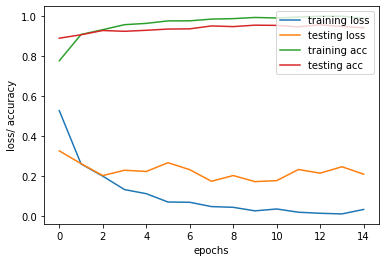

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss/ accuracy')
plt.xlabel('epochs')
plt.legend(['training loss','testing loss','training acc','testing acc'],loc='upper right')
plt.show()

In [110]:
from keras.optimizers import Adam
epochs=10
model_10.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
history_10=model_10.fit(x_train,y_train,epochs=epochs,validation_split=0.25)

Epoch 1/10
142/142 [==============================] - 233s 2s/step - loss: 0.0765 - accuracy: 0.9720 - val_loss: 0.4340 - val_accuracy: 0.8675
Epoch 2/10
142/142 [==============================] - 133s 934ms/step - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.4867 - val_accuracy: 0.8775
Epoch 3/10
142/142 [==============================] - 134s 941ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.4953 - val_accuracy: 0.8722
Epoch 4/10
142/142 [==============================] - 135s 954ms/step - loss: 0.0447 - accuracy: 0.9852 - val_loss: 0.5711 - val_accuracy: 0.8742
Epoch 5/10
142/142 [==============================] - 133s 938ms/step - loss: 0.0409 - accuracy: 0.9850 - val_loss: 0.5385 - val_accuracy: 0.8689
Epoch 6/10
142/142 [==============================] - 130s 916ms/step - loss: 0.0351 - accuracy: 0.9872 - val_loss: 0.5337 - val_accuracy: 0.8709
Epoch 7/10
142/142 [==============================] - 129s 908ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.5878 - va

In [23]:
model.save('FaceMaskDetection-CNN_3.h5')
np.save('history.npy',history.history)

In [81]:
from keras.models import load_model
model=load_model('FaceMaskDetection-CNN_3.h5')
history=np.load('history_3.npy',allow_pickle='TRUE').item()

In [48]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [24]:
score=model.evaluate(x_test,y_test)

57/57 [==============================] - 10s 170ms/step - loss: 0.2514 - accuracy: 0.9371


In [27]:
haar_classifier=cv2.CascadeClassifier('facedetection.xml')

In [47]:
color_dict={0:(0,255,0),1:(0,0,255),2:(0,0,255)}
msg_dict={0:"Check",1:"Alert!",2:"Alert!"}

In [48]:
capture=cv2.VideoCapture(0)
flag,img=capture.read()

while True:
    flag,img=capture.read()
    if flag: 
        cv2.imshow('image',img)
        grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=haar_classifier.detectMultiScale(grayimg)
        for x,y,w,h in faces:            
            face=grayimg[y:y+w,x:x+w]
            face=cv2.resize(face,(rowsize,colsize))
            face=face/255.0
            face=face.reshape(1,rowsize,colsize,1)
            result=model.predict(face)
            
            label=np.argmax(result,axis=1)[0]
            
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
            cv2.putText(img,msg_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.7,color=color_dict[label],thickness=3)
            cv2.imshow('image',img)
            
        if cv2.waitKey(2)==27:
            break
capture.release()
cv2.destroyAllWindows()
    

In [30]:
capture.release()
cv2.destroyAllWindows()